## Importing Libraries

In this step, we import the necessary libraries for data manipulation (`pandas`) and visualization (`plotly.graph_objs` and `plotly.express`). These will help us create interactive bar and line charts for our dashboard.


In [1]:
# Import necessary libraries
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

## Load Dataset

We load the cleaned and merged dataset containing both CitiBike trip data and weather data (temperature) for analysis. This dataset was prepared in the previous tasks.

In [2]:
# Load the cleaned CitiBike + weather merged dataset
df = pd.read_csv('citibike_weather_merged_2022.csv')

# Display the first few rows
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avg_temp_f_tenths,avg_temp_f
0,AD280D4AE55D3506,electric_bike,2022-06-17 17:32:55.309,2022-06-17 17:45:46.076,E 47 St & 2 Ave,6498.10,E 2 St & Avenue C,5476.03,40.753231,-73.970325,40.720874,-73.980858,member,2022-06-17,252,77.4
1,734318BA808A46DC,electric_bike,2022-09-20 17:04:00.975,2022-09-20 17:18:40.884,Monroe St & Bedford Ave,4368.05,Wythe Ave & Metropolitan Ave,5348.02,40.685129,-73.953813,40.716887,-73.963198,member,2022-09-20,232,73.8
2,DE53B4E2A0F3A27A,classic_bike,2022-10-20 19:05:14.263,2022-10-20 19:12:11.338,8 Ave & W 38 St,6526.05,W 35 St & Dyer Ave,6569.08,40.754610,-73.991770,40.754692,-73.997402,member,2022-10-20,111,52.0
3,E39D5C4183A3403C,electric_bike,2022-02-03 17:04:12.668,2022-02-03 17:13:41.827,E 84 St & Park Ave,7243.04,Columbus Ave & W 95 St,7520.07,40.778627,-73.957721,40.791956,-73.968087,member,2022-02-03,64,43.5
4,4C7D7975092F14F7,electric_bike,2022-03-15 12:47:17.204,2022-03-15 12:54:00.503,Greenwich St & Hubert St,5470.10,Centre St & Chambers St,5207.01,40.721319,-74.010065,40.712733,-74.004607,member,2022-03-15,116,52.9


### Bar Chart: Top 20 Most Popular Start Stations

The chart displays the top 20 most frequently used start stations in the CitiBike 2022 dataset. The use of a blue color scale adds visual clarity, highlighting the busiest stations more vividly. This visualization offers valuable insights for optimizing station placements and understanding ridership patterns in New York City.

In [3]:
import plotly.graph_objects as go
import pandas as pd

# Group and sort the data
start_station_counts = df['start_station_name'].value_counts().head(20).reset_index()
start_station_counts.columns = ['start_station_name', 'trip_count']

# Create the bar chart
fig = go.Figure(
    go.Bar(
        x=start_station_counts['start_station_name'],
        y=start_station_counts['trip_count'],
        marker=dict(
            color=start_station_counts['trip_count'],
            colorscale='Sunset',  # Try 'Sunsetdark' or 'Earth' too
            showscale=False
        )
    )
)

# Update layout for better appearance
fig.update_layout(
    title='Top 20 Most Popular Start Stations in NYC (2022)',
    title_font=dict(size=22, color='darkred'),
    xaxis_title='Start Station',
    yaxis_title='Number of Trips',
    xaxis_tickangle=-45,
    xaxis_tickfont=dict(size=10),
    yaxis_tickfont=dict(size=12),
    template='plotly_white',
    margin=dict(l=60, r=20, t=60, b=100)
)

fig.show()

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avg_temp_f_tenths', 'avg_temp_f'],
      dtype='object')

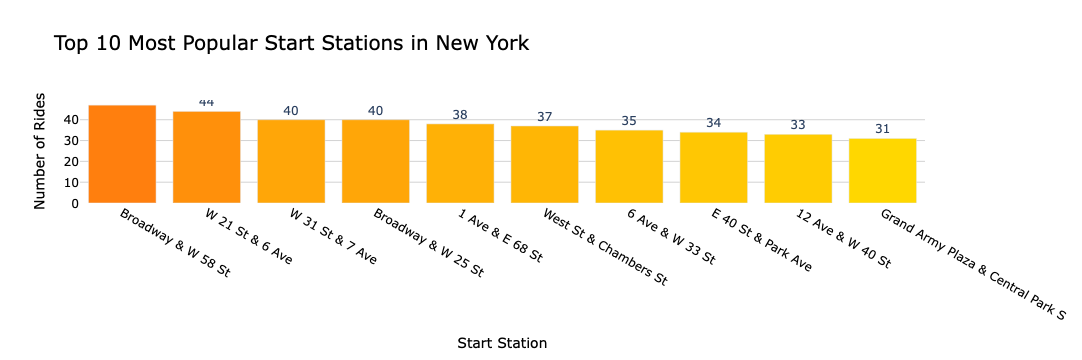

In [5]:
import plotly.express as px

# Group by start station and count rides
popular_stations = df['start_station_name'].value_counts().reset_index()
popular_stations.columns = ['start_station_name', 'ride_count']

# Take top 10 stations
top_stations = popular_stations.head(10)

# Create bar chart
fig = px.bar(
    top_stations,
    x='start_station_name',
    y='ride_count',
    text='ride_count',
    title='Top 10 Most Popular Start Stations in New York',
    color='ride_count',
    color_continuous_scale=['#FFD700', '#FF7F0E']  # gold to orange gradient
)

# Customize layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(title='Start Station',
               title_font=dict(color='black'),
               tickfont=dict(color='black')),
    yaxis=dict(title='Number of Rides',
               title_font=dict(color='black'),
               tickfont=dict(color='black'),
               showgrid=True, gridcolor='lightgrey'),
    title_font=dict(size=20, color='black'),
    coloraxis_showscale=False  # hide color scale
)

fig.show()


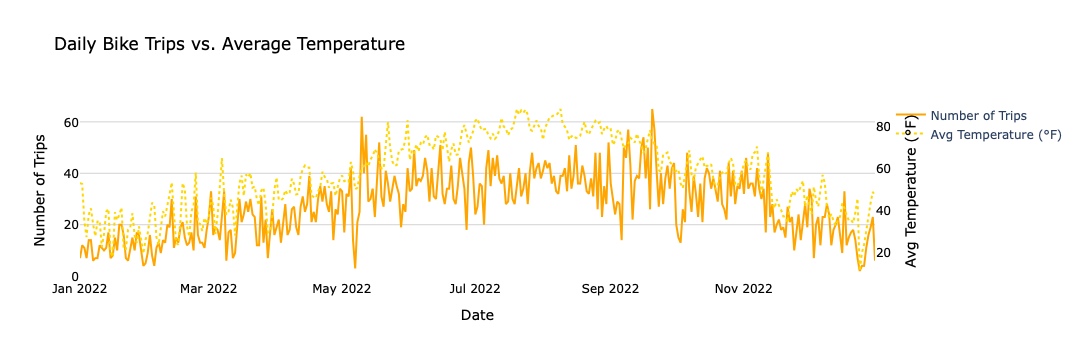

In [6]:
import pandas as pd
import plotly.graph_objects as go

# 1) Make sure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# 2) Aggregate
trips_per_day = df.groupby('date').size().reset_index(name='trip_count')
temp_per_day  = df.groupby('date')['avg_temp_f'].mean().reset_index()

# 3) Merge
merged_df = trips_per_day.merge(temp_per_day, on='date')

# 4) Figure
fig = go.Figure()

# Left axis: trips
fig.add_trace(
    go.Scatter(
        x=merged_df['date'],
        y=merged_df['trip_count'],
        name='Number of Trips',
        mode='lines',
        line=dict(color='orange', width=2)
    )
)

# Right axis: temperature
fig.add_trace(
    go.Scatter(
        x=merged_df['date'],
        y=merged_df['avg_temp_f'],
        name='Avg Temperature (°F)',
        mode='lines',
        line=dict(color='gold', width=2, dash='dot'),
        yaxis='y2'
    )
)

# 5) Layout (no titlefont; use title=dict(...))
fig.update_layout(
    title=dict(text='Daily Bike Trips vs. Average Temperature', font=dict(color='black')),
    xaxis=dict(
        title=dict(text='Date', font=dict(color='black')),
        tickfont=dict(color='black'),
        showgrid=False
    ),
    yaxis=dict(
        title=dict(text='Number of Trips', font=dict(color='black')),
        tickfont=dict(color='black'),
        showgrid=True, gridcolor='lightgrey'
    ),
    yaxis2=dict(
        title=dict(text='Avg Temperature (°F)', font=dict(color='black')),
        tickfont=dict(color='black'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    plot_bgcolor='white',
    hovermode='x unified'
)

fig.show()



## 📈 Dual-Axis Line Chart: Daily Bike Trips vs. Average Temperature  

This visualization compares the **total number of bike trips per day** with the **average daily temperature (°F)** in New York using a dual-axis line chart. The purpose is to explore potential correlations between weather conditions and ridership trends.  

**Design choices:**  
- **Two y-axes**:  
  - Left axis (**orange**) → Daily trip counts.  
  - Right axis (**gold**) → Average temperature in °F.  
- **Color scheme** matches the dashboard’s warm theme for consistency.  
- **Line styles**: Solid line for trip counts, dotted line for temperature to clearly differentiate metrics.  
- **Hover mode**: `x unified` so values for both metrics appear together when hovering over a date.  
- **Background and grid**: White background with light gridlines for clarity without distraction.  

**Key insights:**  
- Warmer months generally correspond to higher ridership.  
- Winter and colder periods show a noticeable drop in bike usage.  
- Peaks and dips in ridership can be directly compared to temperature fluctuations, helping to guide decisions about bike availability, maintenance, and seasonal promotions.


In [7]:
import pandas as pd

# Pick the timestamp column that exists in your file
ts_col = next((c for c in ['started_at','start_time','starttime','date'] if c in df.columns), None)
if ts_col is None:
    raise ValueError("No timestamp column found. Expected one of: started_at, start_time, starttime, date")

# Ensure datetime
df[ts_col] = pd.to_datetime(df[ts_col], errors='coerce')
df = df.dropna(subset=[ts_col])

# Derive fields
df['weekday'] = df[ts_col].dt.day_name()
df['hour']    = df[ts_col].dt.hour

# Build heatmap data (rides per weekday × hour)
hm = (df.groupby(['weekday', 'hour'], as_index=False)
        .size()
        .rename(columns={'size':'rides'}))

# Order weekdays
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hm['weekday'] = pd.Categorical(hm['weekday'], categories=order, ordered=True)
hm = hm.sort_values(['weekday','hour'])

import plotly.express as px

# Option A: density_heatmap
fig = px.density_heatmap(
    hm, x='hour', y='weekday', z='rides',
    nbinsx=24, color_continuous_scale='Sunset',  # your theme
    labels={'hour':'Hour of Day','weekday':'Day of Week','rides':'Rides'}
)
fig.update_layout(plot_bgcolor='white')
fig.show()


## 🔥 Rides by Hour and Day of Week (Heatmap)

This heatmap shows **when people ride** by plotting ride counts across the **hour of day (x-axis)** and **day of week (y-axis)**. It helps reveal commuting peaks, weekend patterns, and off-peak gaps at a glance.

**Data prep (summarized):**
- Convert `started_at` to datetime.
- Derive `hour = started_at.dt.hour` and `weekday = started_at.dt.day_name()`.
- Order weekdays `Mon → Sun` for consistent reading.
- Aggregate counts with  
  `df.groupby(['weekday','hour'], observed=False).size().reset_index(name='rides')`  
  *(setting `observed=False` removes the pandas deprecation warning).*

**Design choices:**
- **Warm “sunset” palette** (`#FFF380 → #FFD700 → #FFB000 → #FF7F0E`) to match the dashboard theme.
- **Ordered weekdays** for natural scanning from Monday to Sunday.
- **Linear hour ticks** every 2 hours for readability.
- **White background + black labels** for accessible contrast.
- **Labeled colorbar** (“Rides”) to make intensity values interpretable.

**How to read it:**
- **Bright / darker cells = more rides** at that time/day.
- **Weekday commute peaks** typically appear around **8–9 AM** and **5–7 PM**.
- **Weekends** often show broader activity through the afternoon, with less pronounced rush-hour spikes.
- **Late night / early morning** (e.g., 1–5 AM) should appear light, indicating low demand.

**Why this is useful:**
- Supports **staffing and rebalancing** decisions by hour and day.
- Informs **maintenance scheduling** during predictable low-demand windows.
- Highlights **marketing opportunities** (e.g., weekend leisure promos vs. weekday commuter bundles).

**Notes:**
- If your source spans multiple years or cities, filter first (e.g., `df[df['date'].dt.year == 2022]`) to keep the pattern focused.
- For larger datasets, consider binning by 2-hour blocks to reduce noise.


In [8]:
# --- Setup & robust column detection ---
import pandas as pd
import plotly.graph_objects as go

# df must already be in memory
# Detect the date column
date_col = next(c for c in df.columns if c.lower() in ("date","started_at","start_time","start_date"))

# Detect an average temperature column
temp_candidates = ["avg_temp_f", "tavg_f", "tavg", "temp_avg_f", "avg_temp_f_tenths"]
temp_col = next(c for c in df.columns if c.lower() in temp_candidates)

# Parse date to date (no time)
d = df.copy()
d[date_col] = pd.to_datetime(d[date_col], errors="coerce").dt.date

# --- Daily aggregation ---
daily = (
    d.groupby(date_col, observed=False)   # explicit observed to avoid warnings
      .agg(rides=(date_col, "size"), avg_temp_f=(temp_col, "mean"))
      .reset_index()
      .rename(columns={date_col: "date"})
)
daily.head()


,date,rides,avg_temp_f
0,2022-01-01,7,116.0
1,2022-01-02,12,114.0
2,2022-01-03,11,14.0
3,2022-01-04,7,-27.0
4,2022-01-05,14,32.0


In [9]:
fig = go.Figure()

# Rides (left axis)
fig.add_trace(go.Scatter(
    x=daily["date"], y=daily["rides"],
    name="Daily Bike Rides",
    mode="lines",
    line=dict(width=2, color="#FF8A00")  # warm orange
))

# Avg temperature (right axis)
fig.add_trace(go.Scatter(
    x=daily["date"], y=daily["avg_temp_f"],
    name="Avg Temp (°F)",
    mode="lines",
    line=dict(width=2, color="#1f77b4", dash="dot"),
    yaxis="y2"
))

fig.update_layout(
    template="plotly_white",                 # matches the exercise vibe; change to "plotly_white" if you prefer
    title="Daily Bike Rides vs. Temperature in NYC (2022)",
    xaxis=dict(title="Date"),
    yaxis=dict(title="Daily Bike Rides"),
    yaxis2=dict(title="Avg Temperature (°F)", overlaying="y", side="right"),
    hovermode="x unified",
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.show()


In [10]:
from IPython.display import IFrame

kepler_html = "citibike_trip_routes.html"  # Your saved map file
display(IFrame(src=kepler_html, width="100%", height=800))
